# Isling Model

In [1]:
from ising import Ising
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Initialise Variables
L, B, J, beta = 32, -0.05, 0.5, 1

num_therm = 50

mag_per_spin_arr = np.zeros(num_therm)
visual_arr = []

# Initialise the Ising Model with the Constants

In [10]:
ising = Ising(L,J,B, beta)


# Do Thermalisation Sweeps and keep track of Mag per Spin

In [11]:
for i in range(num_therm):
    ising.do_thermalisation_sweep()
    mag_per_spin_arr[i] = ising.get_mag_per_spin()
    ising.visualise(i)

In [5]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.0001
fp = flatten_point(rav, threshold)


# Plot Magnetisation per spin against Thermalisation

0.8630445075757576
0.011539146567199395


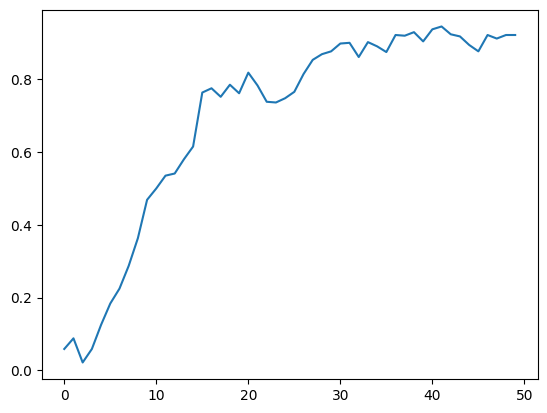

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

In [12]:

# plot magnetisation per spin array against numper of thermalisation sweeps
plt.plot(mag_per_spin_arr)


print(np.mean(mag_per_spin_arr[fp:]))
print(np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:])))

# Create a slider to select the thermalisation sweep to display
slider = widgets.IntSlider(min=0, max=num_therm-1, step=1, value=0)

# Display the slider and the corresponding thermalisation sweep
def update_visualisation(i):
    display(ising.visualisations[i])

widgets.interactive(update_visualisation, i=slider)


## Check Average Mag per Spin with varying J


In [7]:
j_vals = np.linspace(0,1,50)
b_vals = np.linspace(0.09,1,10)
avg_mags = []
B = 0
for j in j_vals:
    ising = Ising(L,j,B, beta)
    for i in range(num_therm):
        ising.do_thermalisation_sweep()
        mag_per_spin_arr[i] = ising.get_mag_per_spin()
    rav = calculate_running_average(mag_per_spin_arr, 5)
    fp = flatten_point(rav, threshold)
    avg_mags.append(np.mean(mag_per_spin_arr[fp:]))
    # print(j, np.mean(mag_per_spin_arr[fp:]))

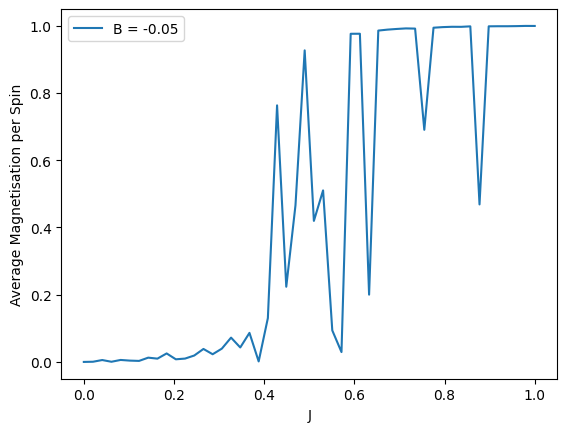

In [8]:
ax, fig = plt.subplots()
fig.plot(j_vals, np.abs(avg_mags), label='B = -0.05')
fig.set_xlabel('J')
fig.set_ylabel('Average Magnetisation per Spin')
fig.legend()

